In [2]:
import os
os.environ['JAX_ENABLE_X64'] = '1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '0.5'

import jax.numpy as jnp
import numpy as np
from temgym_core.components import Detector
from temgym_core.gaussian import GaussianRay, evaluate_gaussian_input_image, make_gaussian_image
from temgym_core.utils import FresnelPropagator
import matplotlib.pyplot as plt
from temgym_core.source import ParallelBeam
%matplotlib widget

In [3]:
z_prop = 1

rng = np.random.default_rng()
r1m = jnp.array(rng.uniform(-1e-3, 1e-3, size=2))
theta1m = jnp.array(rng.uniform(-1e-4, 1e-4, size=2))
print(theta1m)
input_ray = GaussianRay(x=r1m[0], y=r1m[1], dx=theta1m[0], dy=theta1m[1], z=0.0, pathlength=0.0,
                        _one=1.0, amplitude=1.0, waist_xy=jnp.array([1e-4, 1e-4]),
                        radii_of_curv=jnp.array([jnp.inf, jnp.inf]),
                        wavelength=500e-9, theta=0.0)

input_beam = ParallelBeam(z=0.0, radius=0.0)
detector = Detector(z=z_prop, pixel_size=(1e-5, 1e-5), shape=(1024, 1024))
input_image = evaluate_gaussian_input_image(input_ray, detector)

model = [detector]
output_image = make_gaussian_image(input_ray, model)

[-2.30908598e-05  8.93065703e-05]


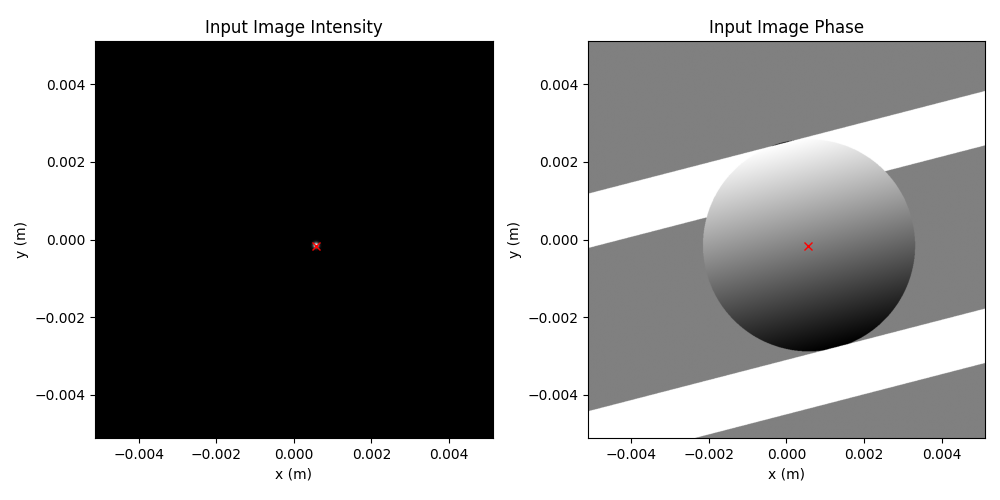

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

detector_width_x, detector_width_y = detector.pixel_size[0] * detector.shape[0], detector.pixel_size[1] * detector.shape[1]
extent = (-detector_width_x / 2, detector_width_x / 2,
          -detector_width_y / 2, detector_width_y / 2)  # in

ax[0].imshow(jnp.abs(input_image)**2, cmap='gray', extent=extent)
ax[0].plot(r1m[0], r1m[1], 'rx')
ax[0].set_title('Input Image Intensity')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')
ax[1].imshow(jnp.angle(input_image), cmap='gray', extent=extent)
ax[1].plot(r1m[0], r1m[1], 'rx')
ax[1].set_title('Input Image Phase')
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel('y (m)')
plt.tight_layout()

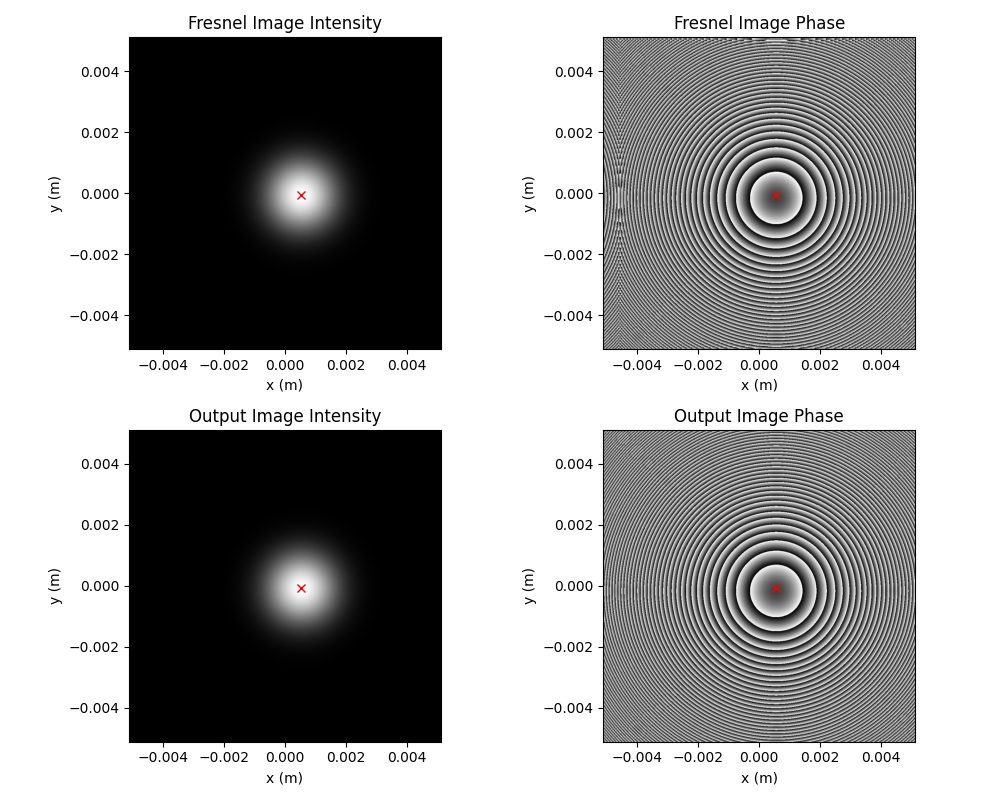

In [5]:
fresnel_image = FresnelPropagator(input_image, detector_width_x, wavelength=input_ray.wavelength, z=z_prop)

r2m = 1.0 * r1m + z_prop * theta1m

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].imshow(jnp.abs(fresnel_image)**2, cmap='gray', extent=extent)
ax[0, 0].plot(r2m[0], r2m[1], 'rx')
ax[0, 0].set_title('Fresnel Image Intensity')
ax[0, 0].set_xlabel('x (m)')
ax[0, 0].set_ylabel('y (m)')
ax[0, 1].imshow(jnp.angle(fresnel_image), cmap='gray', extent=extent)
ax[0, 1].plot(r2m[0], r2m[1], 'rx')
ax[0, 1].set_title('Fresnel Image Phase')
ax[0, 1].set_xlabel('x (m)')
ax[0, 1].set_ylabel('y (m)')
ax[1, 0].imshow(jnp.abs(output_image)**2, cmap='gray', extent=extent)
ax[1, 0].plot(r2m[0], r2m[1], 'rx')
ax[1, 0].set_title('Output Image Intensity')
ax[1, 0].set_xlabel('x (m)')
ax[1, 0].set_ylabel('y (m)')
ax[1, 1].imshow(jnp.angle(output_image), cmap='gray', extent=extent)
ax[1, 1].plot(r2m[0], r2m[1], 'rx')
ax[1, 1].set_title('Output Image Phase')
ax[1, 1].set_xlabel('x (m)')
ax[1, 1].set_ylabel('y (m)')
plt.tight_layout()



In [6]:
max_idx_fresnel = jnp.argmax(jnp.abs(fresnel_image))
max_idx_output = jnp.argmax(jnp.abs(output_image))
print(f"Max index Fresnel: {max_idx_fresnel}, Max index Output: {max_idx_output}")

Max index Fresnel: 532022, Max index Output: 532022


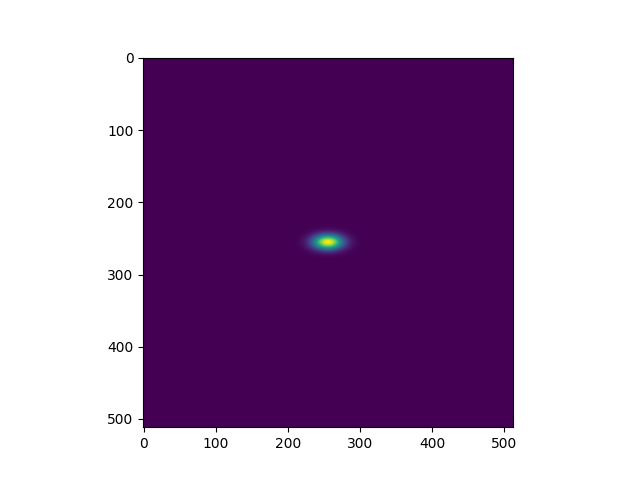

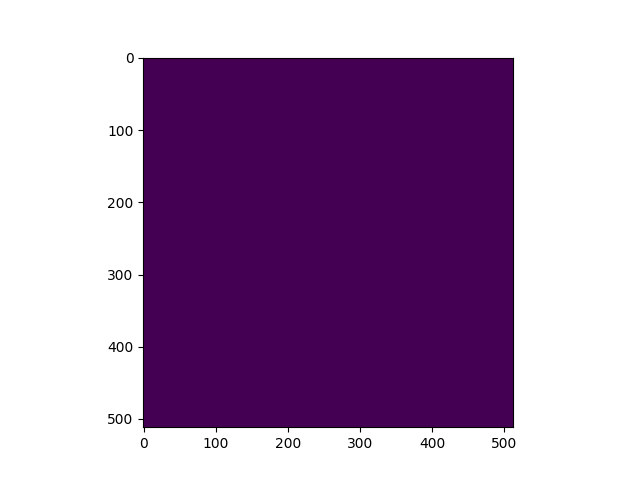

: 

In [ ]:
rays = GaussianRay(
    x=0.0,
    y=0.0,
    dx=0.0,
    dy=0.0,
    z=0.0,
    pathlength=0.0,
    _one=1.0,
    amplitude=1.0,
    waist_xy=jnp.array([2e-4, 1e-4]),
    radii_of_curv=jnp.array([jnp.inf, jnp.inf]),
    wavelength=500e-9,
    theta=0,  # 45 degrees
)

detector = Detector(z=0.0, pixel_size=(1e-5, 1e-5), shape=(512, 512))
image = evaluate_gaussian_input_image(rays, detector)

plt.figure()
plt.imshow(np.abs(image), cmap='viridis')


plt.figure()
plt.imshow(np.angle(image), cmap='viridis')